<a href="https://colab.research.google.com/github/MicahMeadows/CSC-781-GoogleColab/blob/main/gradient_diabetes_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk

In [2]:
# diabetes data
data = sk.load_diabetes()

samples = data.data[:, 2]
labels = data.target

fixed_samples = np.array((samples, labels)).T
np.random.shuffle(fixed_samples)

np.random.shuffle(fixed_samples)

num_samples_total = len(fixed_samples)

def split_fixed_samples(fixed_samples):
  feature_objects = fixed_samples[: , 0:1].flatten()
  label_objects = fixed_samples[: , -1]
  return feature_objects, label_objects

top_train_idx = int(num_samples_total * .70)
top_dev_idx = int(num_samples_total * .85)

train_bmis, train_bpls = split_fixed_samples(fixed_samples[:top_train_idx])
dev_bmis, dev_bpls = split_fixed_samples(fixed_samples[top_train_idx:top_dev_idx])
test_bmis, test_bpls = split_fixed_samples(fixed_samples[top_dev_idx:])

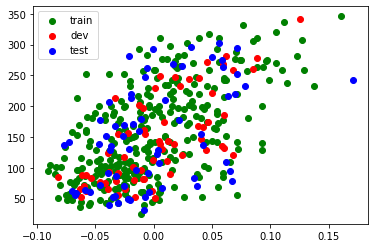

In [3]:
plt.scatter(train_bmis, train_bpls, color='g')
plt.scatter(dev_bmis, dev_bpls, color='r')
plt.scatter(test_bmis, test_bpls, color='b')
plt.legend(('train', 'dev', 'test'))

In [35]:
# linear regression model
def univariant_linear_regression(theta, input):
  pred = theta[0] + theta[1] * input
  return pred

def compute_cost(y_pred, y_true):
  m = len(y_true)
  J = 1/(2*m) * np.sum((y_pred - y_true) ** 2) # MSE
  return J

def update_theta(theta, x, y_true, y_pred, learning_rate):
  m = len(y_true)
  theta[0] = theta[0] - (learning_rate * (1/m) * np.sum(y_pred - y_true))/m
  theta[1] = theta[1] - (learning_rate * (1/m) * np.sum((y_pred - y_true) * x))/m
  return theta

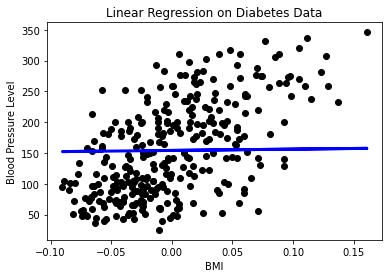

In [52]:
theta = [0.0, 0.0]
learning_rate = .3
number_train_cycles = 10000

for i in range(number_train_cycles):
  pred = univariant_linear_regression(theta, train_bmis)
  cost = compute_cost(pred, train_bpls)
  theta = update_theta(theta, train_bmis, train_bpls, pred, learning_rate)

plt.scatter(train_bmis, train_bpls, color='black')
plt.plot(train_bmis, univariant_linear_regression(theta, train_bmis), color='blue', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Blood Pressure Level')
plt.title('Linear Regression on Diabetes Data')
plt.show()